In [0]:
import pandas as pd
import numpy as np

In [0]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Data

In [0]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [0]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [0]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [0]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [0]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [15]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [0]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [18]:
ls

adc.json  my_drive/  sample_data/


In [19]:
cd my_drive/HumanActivityRecognition/HAR

/content/my_drive/HumanActivityRecognition/HAR


In [20]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [21]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [0]:
import numpy as np
import matplotlib.pyplot as plt


###### Testing outputs of different models with different hidden layers and dropout   

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 18s 2ms/step - loss: 1.4601 - acc: 0.3921 - val_loss: 1.2578 - val_acc: 0.4812
Epoch 2/10
7352/7352 [==============================] - 9s 1ms/step - loss: 1.1365 - acc: 0.5140 - val_loss: 1.1802 - val_acc: 0.5049
Epoch 3/10
7352/7352 [==============================] - 9s 1ms/step - loss: 1.0700 - acc: 0.5350 - val_loss: 1.0273 - val_acc: 0.5314
Epoch 4/10
7352/7352 [==============================] - 9s 1ms/step - loss: 0.9297 - acc: 0.5891 - val_loss: 0.9279 - val_acc: 0.5480
Epoch 5/10
7352/7352 [==============================] - 9s 1ms/step - loss: 0.8471 - acc: 0.6258 - val_loss: 1.0650 - val_acc: 0.5056
Epoch 6/10
7352/7352 [==============================] - 9s 1ms/step - loss: 0.9012 - acc: 0.5926 - val_loss: 0.9124 - val_acc: 0.5718
Epoch 7/10
7352/7352 [==============================] - 9s 1ms/step - loss: 0.8118 - acc: 0.6299 - val_loss: 0.8039 - val_acc: 0.6155
Epoch 8/10
73

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 22s 3ms/step - loss: 1.3661 - acc: 0.4241 - val_loss: 1.2027 - val_acc: 0.4605
Epoch 2/10
7352/7352 [==============================] - 9s 1ms/step - loss: 1.0807 - acc: 0.5182 - val_loss: 1.1048 - val_acc: 0.5355
Epoch 3/10
7352/7352 [==============================] - 9s 1ms/step - loss: 0.9315 - acc: 0.5514 - val_loss: 0.8947 - val_acc: 0.5263
Epoch 4/10
7352/7352 [==============================] - 9s 1ms/step - loss: 1.0737 - acc: 0.4888 - val_loss: 1.3380 - val_acc: 0.3688
Epoch 5/10
7352/7352 [==============================] - 9s 1ms/step - loss: 1.1226 - acc: 0.4995 - val_loss: 1.2918 - val_acc: 0.4337
Epoch 6/10
7352/7352 [==============================] - 9s 1ms/step - loss: 1.1857 - acc: 0.4403 - val_loss: 1.2056 - val_acc: 0.4377
Epoch 7/10
7352/7352 [==============================] - 9s 1ms/step - loss: 0.9693 - acc: 0.5529 - val_loss: 0.9812 - val_acc: 0.5490
Epoch 8/10
73

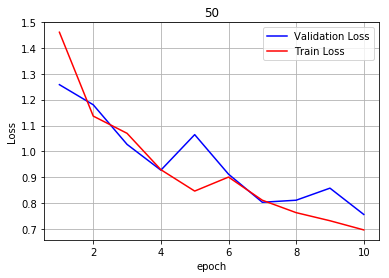

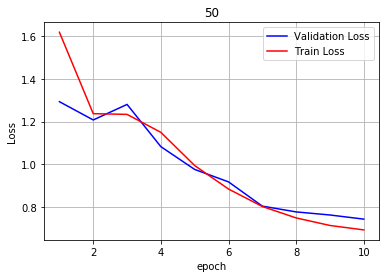

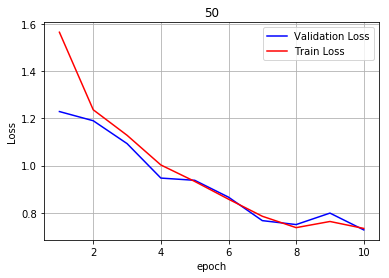

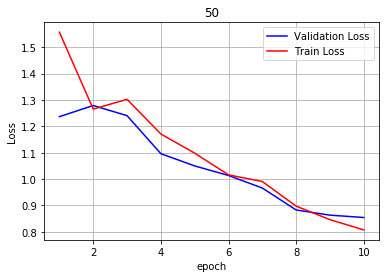

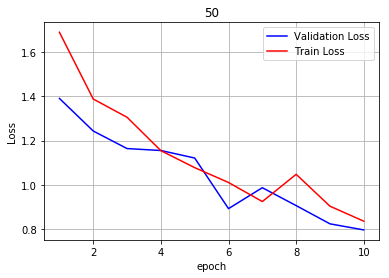

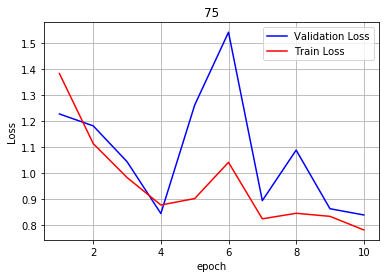

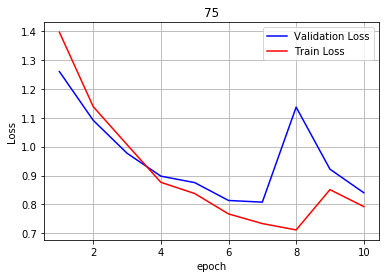

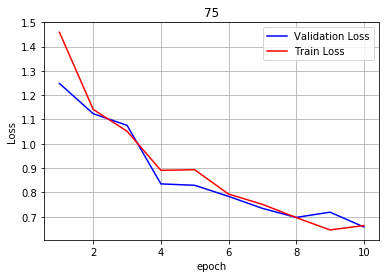

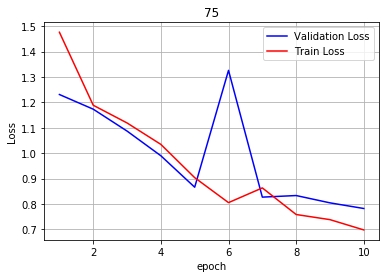

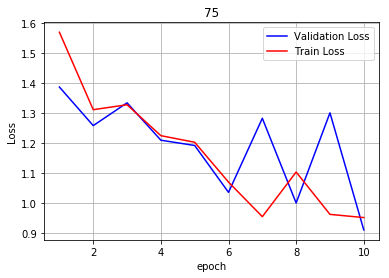

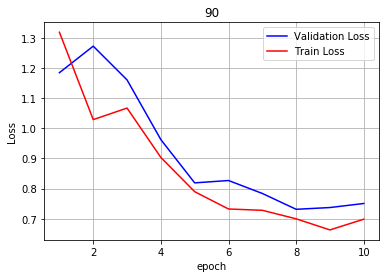

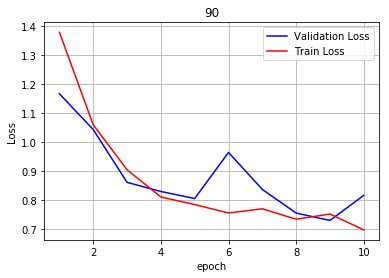

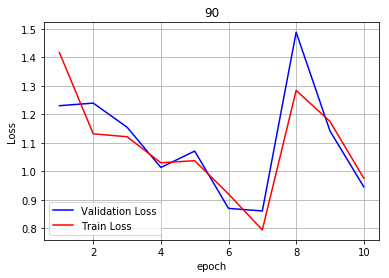

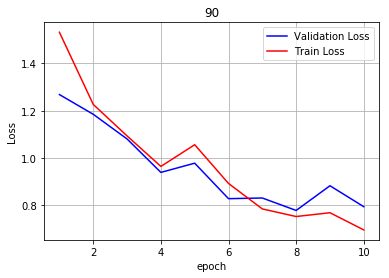

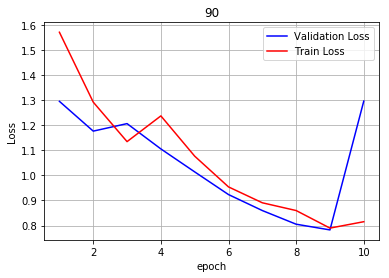

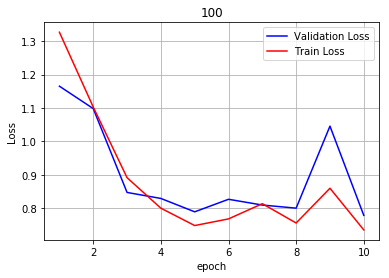

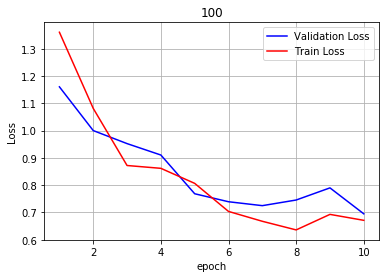

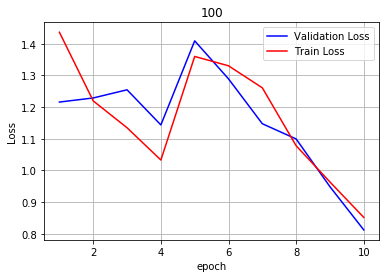

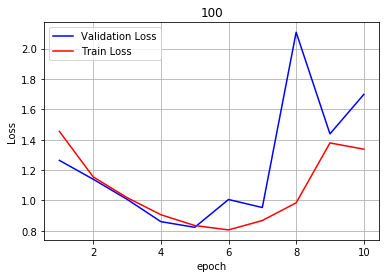

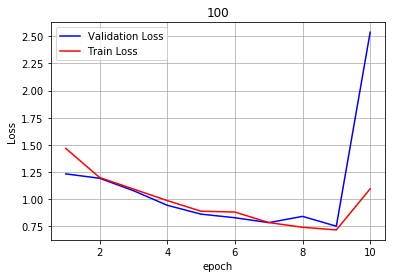

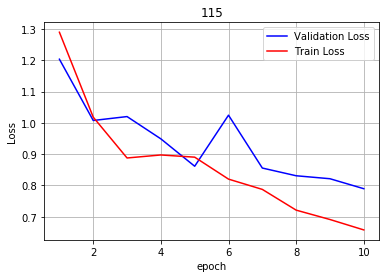

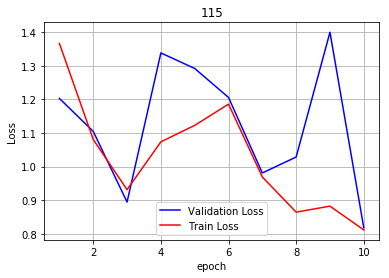

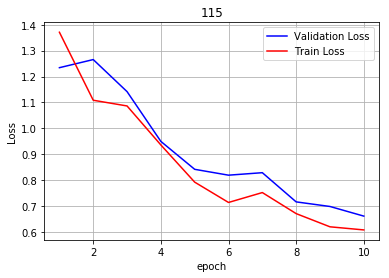

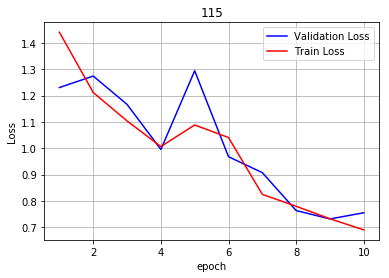

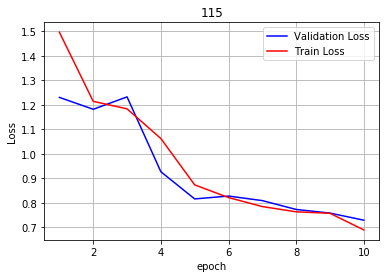

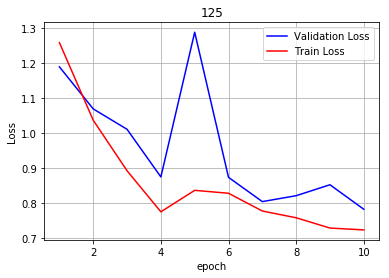

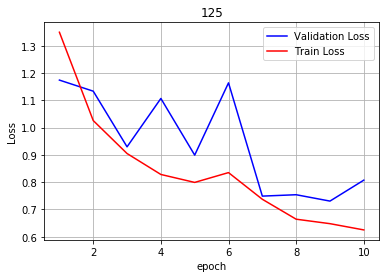

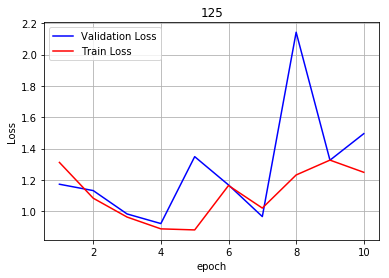

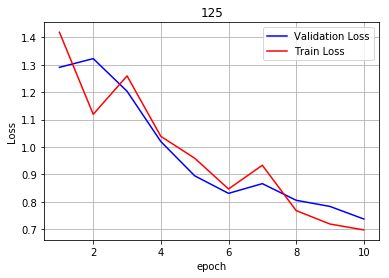

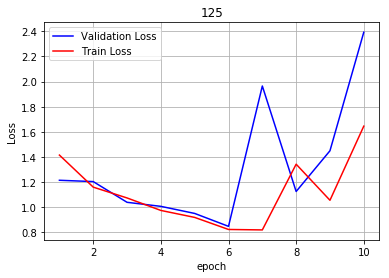

In [0]:
# Initializing parameters
epochs = 10
batch_size = 150
n_hidden = [50,75,90,100,115,125]
dropout=[0.4,0.5,0.6,0.7,0.8]
for i in n_hidden:
  for j in dropout:
# Initiliazing the sequential model
    model = Sequential()
# Configuring the parameters
    model.add(LSTM(i, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
    model.add(Dropout(j))
    model.add(BatchNormalization())
# Adding a dense output layer with sigmoid activation
    model.add(Dense(n_classes, activation='sigmoid'))
  #model.summary()
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    history = model.fit(X_train,
            Y_train,
            batch_size=batch_size,
            validation_data=(X_test, Y_test),
            epochs=epochs)
    score = model.evaluate(X_test, Y_test, verbose=0) 
    print('Test score:', score[0]) 
    print('Test accuracy:', score[1])
    x = list(range(1,epochs+1))
    vy = history.history['val_loss']
    ty = history.history['loss']
    plt.figure()
    plt.plot(x, vy, 'b', label="Validation Loss")
    plt.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.title(i)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.grid()


###### Training the best found model with diffrerent epochs and batch size 

In [1]:
#Model1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 115)               57500     
_________________________________________________________________
dropout_64 (Dropout)         (None, 115)               0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 115)               460       
_________________________________________________________________
dense_64 (Dense)             (None, 6)                 696       
Total params: 58,656
Trainable params: 58,426
Non-trainable params: 230
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/25
7352/7352 [==============================] - 104s 14ms/step - loss: 1.0967 - acc: 0.5450 - val_loss: 0.9265 - val_acc: 0.5511
Epoch 2/25
7352/7352 [==============================] - 85s 12ms/step - loss: 0.793

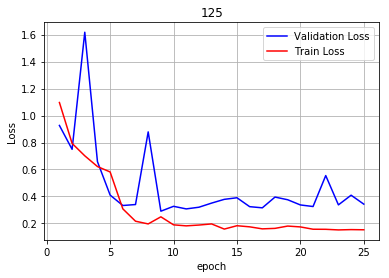

In [0]:

# Initializing parameters
epochs = 25
batch_size = 15
n_hidden = 115
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
model.add(BatchNormalization())
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# Training the model
history = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)    
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.figure()
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()


In [2]:
#Model2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 115)               57500     
_________________________________________________________________
dropout_8 (Dropout)          (None, 115)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 115)               460       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 696       
Total params: 58,656
Trainable params: 58,426
Non-trainable params: 230
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/25
7352/7352 [==============================] - 78s 11ms/step - loss: 1.1125 - acc: 0.5239 - val_loss: 1.2553 - val_acc: 0.4897
Epoch 2/25
7352/7352 [==============================] - 73s 10ms/step - loss: 0.7581

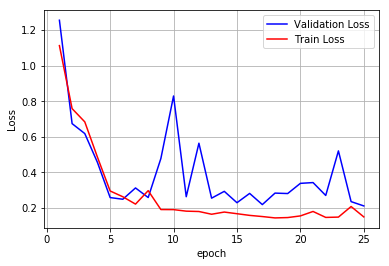

In [0]:

# Initializing parameters
epochs = 25
batch_size = 20
n_hidden = 115
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
model.add(BatchNormalization())
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# Training the model
history = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)    
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.figure()
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()


In [0]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                  0      399  ...                   0                 2
STANDING                 0       63  ...                   0                 0
WALKING                  0        1  ...                  11                 7
WALKING_DOWNSTAIRS       0        0  ...                 413                 5
WALKING_UPSTAIRS         0        1  ...                   0               467

[6 rows x 6 columns]


In [0]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 7s 3ms/step


In [0]:
score

[0.2106840094042137, 0.9362063115032236]

###### Testing out different Two Layer Lstm models with best found model parameters

#Model1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128, 115)          57500     
_________________________________________________________________
lstm_10 (LSTM)               (None, 30)                17520     
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 30)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 186       
Total params: 75,326
Trainable params: 75,266
Non-trainable params: 60
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 151s 20ms/step - loss: 1.2186 - a

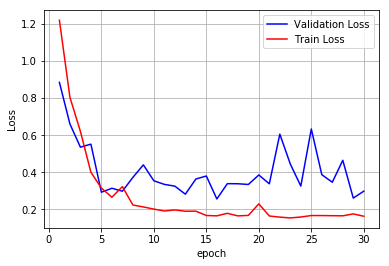

In [0]:

# Initializing parameters
epochs = 30
batch_size = 20
n_hidden = 115
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim),return_sequences=True))
model.add(LSTM(30))

# Adding a dropout layer
model.add(Dropout(0.6))
model.add(BatchNormalization())
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# Training the model
history = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)    
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.figure()
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()


In [25]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 537        0  ...                   0                 0
SITTING                 25      413  ...                   0                 0
STANDING                30       79  ...                   0                 0
WALKING                  0        0  ...                   6                 9
WALKING_DOWNSTAIRS       0        0  ...                 420                 0
WALKING_UPSTAIRS         0        0  ...                   0               457

[6 rows x 6 columns]


In [26]:
score = model.evaluate(X_test, Y_test)

2947/2947 [==============================] - 11s 4ms/step


In [28]:
score

[0.2984850606552815, 0.9317950458092976]

In [3]:
#Model2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 128, 115)          57500     
_________________________________________________________________
lstm_12 (LSTM)               (None, 40)                24960     
_________________________________________________________________
dropout_6 (Dropout)          (None, 40)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 40)                160       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 246       
Total params: 82,866
Trainable params: 82,786
Non-trainable params: 80
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 103s 14ms/step - loss: 1.1982 - a

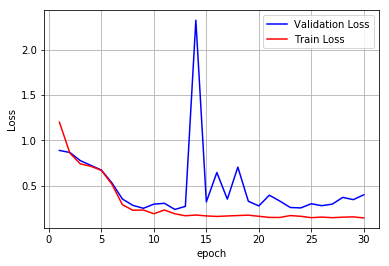

In [0]:

# Initializing parameters
epochs = 30
batch_size = 30
n_hidden = 115
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim),return_sequences=True))
model.add(LSTM(40))

# Adding a dropout layer
model.add(Dropout(0.65))
model.add(BatchNormalization())
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# Training the model
history = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)    
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.figure()
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()


In [4]:
#Model3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 115)          57500     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30)                17520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 186       
Total params: 75,326
Trainable params: 75,266
Non-trainable params: 60
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 134s 18ms/step - loss: 1.1831 - a

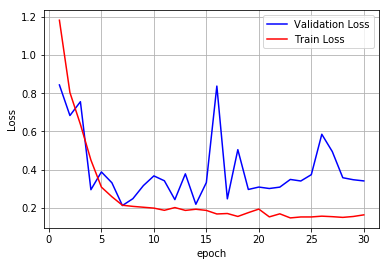

In [24]:

# Initializing parameters
epochs = 30
batch_size = 15
n_hidden = 115
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim),return_sequences=True))
model.add(LSTM(30))

# Adding a dropout layer
model.add(Dropout(0.6))
model.add(BatchNormalization())
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# Training the model
history = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)    
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt.figure()
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()


###### Observation 

In [3]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
table= PrettyTable()
table.field_names = ["Model","n_hidden","Epochs","Dropout","Batch_size","Accuracy"]
table.add_row(["Single Layer",115,25,0.6,25,0.916])
table.add_row(["Single Layer",115,25,0.6,20,0.9362])
table.add_row(["Two Layer","(115,30)",30,0.6,20,0.9317])
table.add_row(["Two Layer","(115,40)",30,0.65,30,0.9199])
table.add_row(["Two Layer","(115,30)",30,0.6,15,0.926])

In [4]:
print(table)

+--------------+----------+--------+---------+------------+----------+
|    Model     | n_hidden | Epochs | Dropout | Batch_size | Accuracy |
+--------------+----------+--------+---------+------------+----------+
| Single Layer |   115    |   25   |   0.6   |     25     |  0.916   |
| Single Layer |   115    |   25   |   0.6   |     20     |  0.9362  |
|  Two Layer   | (115,30) |   30   |   0.6   |     20     |  0.9362  |
|  Two Layer   | (115,40) |   30   |   0.65  |     30     |  0.9199  |
|  Two Layer   | (115,30) |   30   |   0.6   |     15     |  0.926   |
+--------------+----------+--------+---------+------------+----------+


###### Conculsion

It can conclded form the above table that single layer Lstm model with  n_hidden =115,25 epochs, with dropout rate of 0.6 and batch size 0f 20 prodiced the best acuracy out of all the other models .


###### Steps Taken 

1)Experimented with diffrent drop out and n_hidden values with higher batch sizes (to speed up the training) to find the best drop out and n_hidden combination 

2)Later experimented with different batch sizes and epochs to find the best model

3)Used the same drop out and n_hidden combination to build two layer model and also experimented with different n hidden and drop out and batch sizes 